#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [46]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [47]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [48]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [49]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [50]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [52]:
model = Sequential()

In [53]:
#卷積層1

In [54]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [55]:
model.add(Dropout(rate=0.25))

In [56]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [57]:
#卷積層2與池化層2

In [58]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [59]:
model.add(Dropout(0.25))

In [60]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [61]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [62]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [63]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [64]:
model.add(Dense(10, activation='softmax'))

In [65]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [66]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [67]:
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize,
                        y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=3,
                        batch_size=128,
                        verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/3
37500/37500 [==============================] - 92s 2ms/step - loss: 2.1763 - accuracy: 0.1962 - val_loss: 2.0498 - val_accuracy: 0.3062
Epoch 2/3
37500/37500 [==============================] - 94s 3ms/step - loss: 1.9267 - accuracy: 0.3124 - val_loss: 1.9129 - val_accuracy: 0.3602
Epoch 3/3
37500/37500 [==============================] - 95s 3ms/step - loss: 1.7845 - accuracy: 0.3658 - val_loss: 1.7810 - val_accuracy: 0.4060


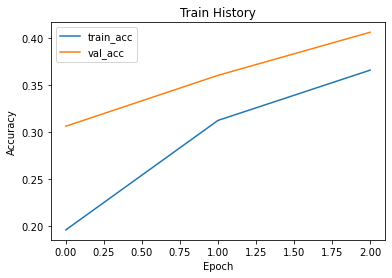

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
show_train_history('accuracy','val_accuracy')

In [70]:
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''
model.compile(loss='MSE',
              optimizer='sgd',
              metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize,
                        y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=3,
                        batch_size=128,
                        verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/3
37500/37500 [==============================] - 98s 3ms/step - loss: 0.0744 - accuracy: 0.3928 - val_loss: 0.0764 - val_accuracy: 0.4110
Epoch 2/3
37500/37500 [==============================] - 100s 3ms/step - loss: 0.0741 - accuracy: 0.3945 - val_loss: 0.0762 - val_accuracy: 0.4138
Epoch 3/3
37500/37500 [==============================] - 100s 3ms/step - loss: 0.0739 - accuracy: 0.4009 - val_loss: 0.0761 - val_accuracy: 0.4144


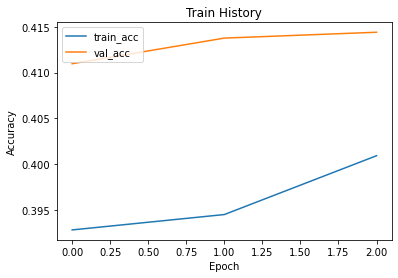

In [71]:
show_train_history('accuracy','val_accuracy')

In [72]:
'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize,
                        y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=3,
                        batch_size=128,
                        verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/3
37500/37500 [==============================] - 100s 3ms/step - loss: 0.2527 - accuracy: 0.9053 - val_loss: 0.2604 - val_accuracy: 0.9012
Epoch 2/3
37500/37500 [==============================] - 100s 3ms/step - loss: 0.2512 - accuracy: 0.9055 - val_loss: 0.2587 - val_accuracy: 0.9015
Epoch 3/3
37500/37500 [==============================] - 107s 3ms/step - loss: 0.2497 - accuracy: 0.9058 - val_loss: 0.2576 - val_accuracy: 0.9016


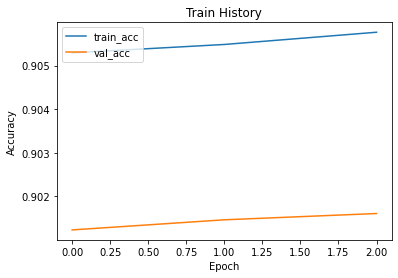

In [73]:
show_train_history('accuracy','val_accuracy')